<a href="https://www.kaggle.com/code/fejnrenrjen/eda-on-housing-supply-vancouver?scriptVersionId=102060645" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-affordability-in-canada/Structural-dwellings-household-size.csv
/kaggle/input/housing-affordability-in-canada/income-distribution-2012-2020.csv
/kaggle/input/housing-affordability-in-canada/HPI 1981-2022 federal and provincial.csv
/kaggle/input/housing-affordability-in-canada/population_dwellings_count.csv
/kaggle/input/housing-affordability-in-canada/Interest and mortgage rates 1951-2022.csv
/kaggle/input/housing-affordability-in-canada/population-by-region-1946-2022.csv
/kaggle/input/housing-affordability-in-canada/CPI-inflation-by-region-1914-202.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-price-rental.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/ottawa_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/saguenay_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/ca

In [2]:
df_master = pd.read_csv("/kaggle/input/housing-affordability-in-canada/housing-supply-price-rental.csv")

In [3]:
df_master.year.unique()

array([1990. , 1991. , 1992. , 1993. , 1994. , 1995. , 1996. , 1997. ,
       1998. , 1999. , 2000. , 2001. , 2002. , 2003. , 2004. , 2005. ,
       2006. , 2007. , 2008. , 2009. , 2010. , 2011. , 2012. , 2013. ,
       2014. , 2015. , 2016. , 1993.1])

In [4]:
#converting years into integer

from datetime import datetime


df_master = df_master[df_master['year'] != 1993.1].astype({'year': int})

#converting year into datetime
df_master['year'] = df_master['year'].transform(lambda x : datetime.strptime(str(x), '%Y'))

df_master.year.unique()

array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000'], dtype='dat

In [5]:
#pulling out statistics for the Toronto region
vancouver_df = df_master[df_master.region == 'vancouver']
vancouver_df.head(5)

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
27,0,1990-01-01,17970,6316,11654,607,3047,8000,17970,6425.0,...,566,751,876,1608.288,65.6,2.457594,6.6,NaN,26077,vancouver
28,1,1991-01-01,14769,6991,7778,430,1429,5919,14769,7080.0,...,585,752,896,1646.854,65.6,2.457594,6.6,NaN,26077,vancouver
29,2,1992-01-01,18684,7603,11081,770,2542,7769,18684,7759.0,...,594,771,902,1691.289,65.6,2.457594,6.6,NaN,26077,vancouver
30,3,1993-01-01,21307,6593,14714,929,2340,11445,21307,6899.0,...,611,790,935,1736.726,65.6,2.457594,6.6,NaN,26077,vancouver
31,4,1994-01-01,20473,6345,14128,822,2672,10634,20473,6627.0,...,623,812,957,1792.984,65.6,2.457594,6.6,NaN,26077,vancouver


In [ ]:
'''
#read the data in pandas format
vancouver_df =pd.read_csv('/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/vancouver_section1_.csv')
vancouver_df.head()
'''

In [6]:
#checking the columns
vancouver_df.columns

Index(['Unnamed: 0', 'year', 'total_dwelling', 'single_detached', 'multiple',
       'semi_detached', 'row', 'apartment', 'total_dwelling_market',
       'homeownership_freehold', 'rental', 'homeownership_condo', 'other',
       'completed', 'res_building_permit', 'res_building_permit_amount',
       'completed_but_unabsorbed_homes', 'new_single_and_semi_detached',
       'new_rows_and_apartment', 'rental_vacancy_rate',
       'rental_avilability_rate', 'vacancy_rate_seniors', 'vacancy_rate_condo',
       'HPI_change', 'CPI_change', 'owned_accommodation_costs_change',
       'rental_accommodation_costs_change', 'bachelor', 'one_bedroom',
       'two_bedroom', 'three_bedroom', 'population',
       'labour_participation_rate', 'employment_change', 'unemployment_rate',
       'disposable_income_change', 'migration', 'region'],
      dtype='object')

In [7]:
#check whether the head and tail of the pandas dataframe are consistent
vancouver_df.tail()

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
49,22,2012-01-01,19027,3381,15646,480,2389,12777,19027,5655.0,...,982,1261,1480,2411.326,66.1,1.853969,6.8,NaN,28746,vancouver
50,23,2013-01-01,18696,4004,14692,510,2373,11809,18696,3840.0,...,1005,1281,1498,2444.333,64.9,0.040093,6.6,NaN,23539,vancouver
51,24,2014-01-01,19212,4374,14838,508,2719,11611,19212,4354.0,...,1038,1311,1542,2481.896,64.7,2.300417,5.8,NaN,28344,vancouver
52,25,2015-01-01,20863,4622,16241,486,2512,13243,20863,4454.0,...,1079,1368,1615,2507.420,64.7,1.739403,5.9,NaN,16711,vancouver
53,26,2016-01-01,27914,5169,22745,430,3398,18917,27914,4757.0,...,1159,1450,1631,2548.740,66.4,4.674625,5.4,NaN,25294,vancouver


In [8]:
len(vancouver_df)

27

In [9]:
len(vancouver_df.drop_duplicates())

27

In [10]:
#review the data types of each column
vancouver_df.dtypes

Unnamed: 0                                    int64
year                                 datetime64[ns]
total_dwelling                                int64
single_detached                               int64
multiple                                      int64
semi_detached                                 int64
row                                           int64
apartment                                     int64
total_dwelling_market                         int64
homeownership_freehold                      float64
rental                                        int64
homeownership_condo                           int64
other                                         int64
completed                                     int64
res_building_permit                           int64
res_building_permit_amount                  float64
completed_but_unabsorbed_homes                int64
new_single_and_semi_detached                  int64
new_rows_and_apartment                        int64
rental_vacan

In [11]:
#Confirm the rename columns
vancouver_df.head()

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
27,0,1990-01-01,17970,6316,11654,607,3047,8000,17970,6425.0,...,566,751,876,1608.288,65.6,2.457594,6.6,NaN,26077,vancouver
28,1,1991-01-01,14769,6991,7778,430,1429,5919,14769,7080.0,...,585,752,896,1646.854,65.6,2.457594,6.6,NaN,26077,vancouver
29,2,1992-01-01,18684,7603,11081,770,2542,7769,18684,7759.0,...,594,771,902,1691.289,65.6,2.457594,6.6,NaN,26077,vancouver
30,3,1993-01-01,21307,6593,14714,929,2340,11445,21307,6899.0,...,611,790,935,1736.726,65.6,2.457594,6.6,NaN,26077,vancouver
31,4,1994-01-01,20473,6345,14128,822,2672,10634,20473,6627.0,...,623,812,957,1792.984,65.6,2.457594,6.6,NaN,26077,vancouver


In [12]:
#determining the shape of the column
vancouver_df.shape

(27, 38)

In [13]:
#want to remove the last 2 rows of the dataframe
vancouver_df.tail()

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
49,22,2012-01-01,19027,3381,15646,480,2389,12777,19027,5655.0,...,982,1261,1480,2411.326,66.1,1.853969,6.8,NaN,28746,vancouver
50,23,2013-01-01,18696,4004,14692,510,2373,11809,18696,3840.0,...,1005,1281,1498,2444.333,64.9,0.040093,6.6,NaN,23539,vancouver
51,24,2014-01-01,19212,4374,14838,508,2719,11611,19212,4354.0,...,1038,1311,1542,2481.896,64.7,2.300417,5.8,NaN,28344,vancouver
52,25,2015-01-01,20863,4622,16241,486,2512,13243,20863,4454.0,...,1079,1368,1615,2507.420,64.7,1.739403,5.9,NaN,16711,vancouver
53,26,2016-01-01,27914,5169,22745,430,3398,18917,27914,4757.0,...,1159,1450,1631,2548.740,66.4,4.674625,5.4,NaN,25294,vancouver


In [ ]:
'''
#REMOVING THE LAST TWO ROWS OF THE DATAFRAME
vancouver_df_col_modified.drop([27,28], axis=0, inplace=True)
'''

In [14]:
vancouver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 27 to 53
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         27 non-null     int64         
 1   year                               27 non-null     datetime64[ns]
 2   total_dwelling                     27 non-null     int64         
 3   single_detached                    27 non-null     int64         
 4   multiple                           27 non-null     int64         
 5   semi_detached                      27 non-null     int64         
 6   row                                27 non-null     int64         
 7   apartment                          27 non-null     int64         
 8   total_dwelling_market              27 non-null     int64         
 9   homeownership_freehold             27 non-null     float64       
 10  rental                             27 n

In [15]:
#checking the null values
vancouver_df.isnull().values.any()

True

In [16]:
#checking the null values
vancouver_df.isnull().sum().sum()

27

In [17]:
vancouver_df_clean = vancouver_df.dropna(how='all', axis=1)
vancouver_df_clean.head(5)

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,bachelor,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,migration,region
27,0,1990-01-01,17970,6316,11654,607,3047,8000,17970,6425.0,...,472,566,751,876,1608.288,65.6,2.457594,6.6,26077,vancouver
28,1,1991-01-01,14769,6991,7778,430,1429,5919,14769,7080.0,...,472,585,752,896,1646.854,65.6,2.457594,6.6,26077,vancouver
29,2,1992-01-01,18684,7603,11081,770,2542,7769,18684,7759.0,...,480,594,771,902,1691.289,65.6,2.457594,6.6,26077,vancouver
30,3,1993-01-01,21307,6593,14714,929,2340,11445,21307,6899.0,...,494,611,790,935,1736.726,65.6,2.457594,6.6,26077,vancouver
31,4,1994-01-01,20473,6345,14128,822,2672,10634,20473,6627.0,...,513,623,812,957,1792.984,65.6,2.457594,6.6,26077,vancouver


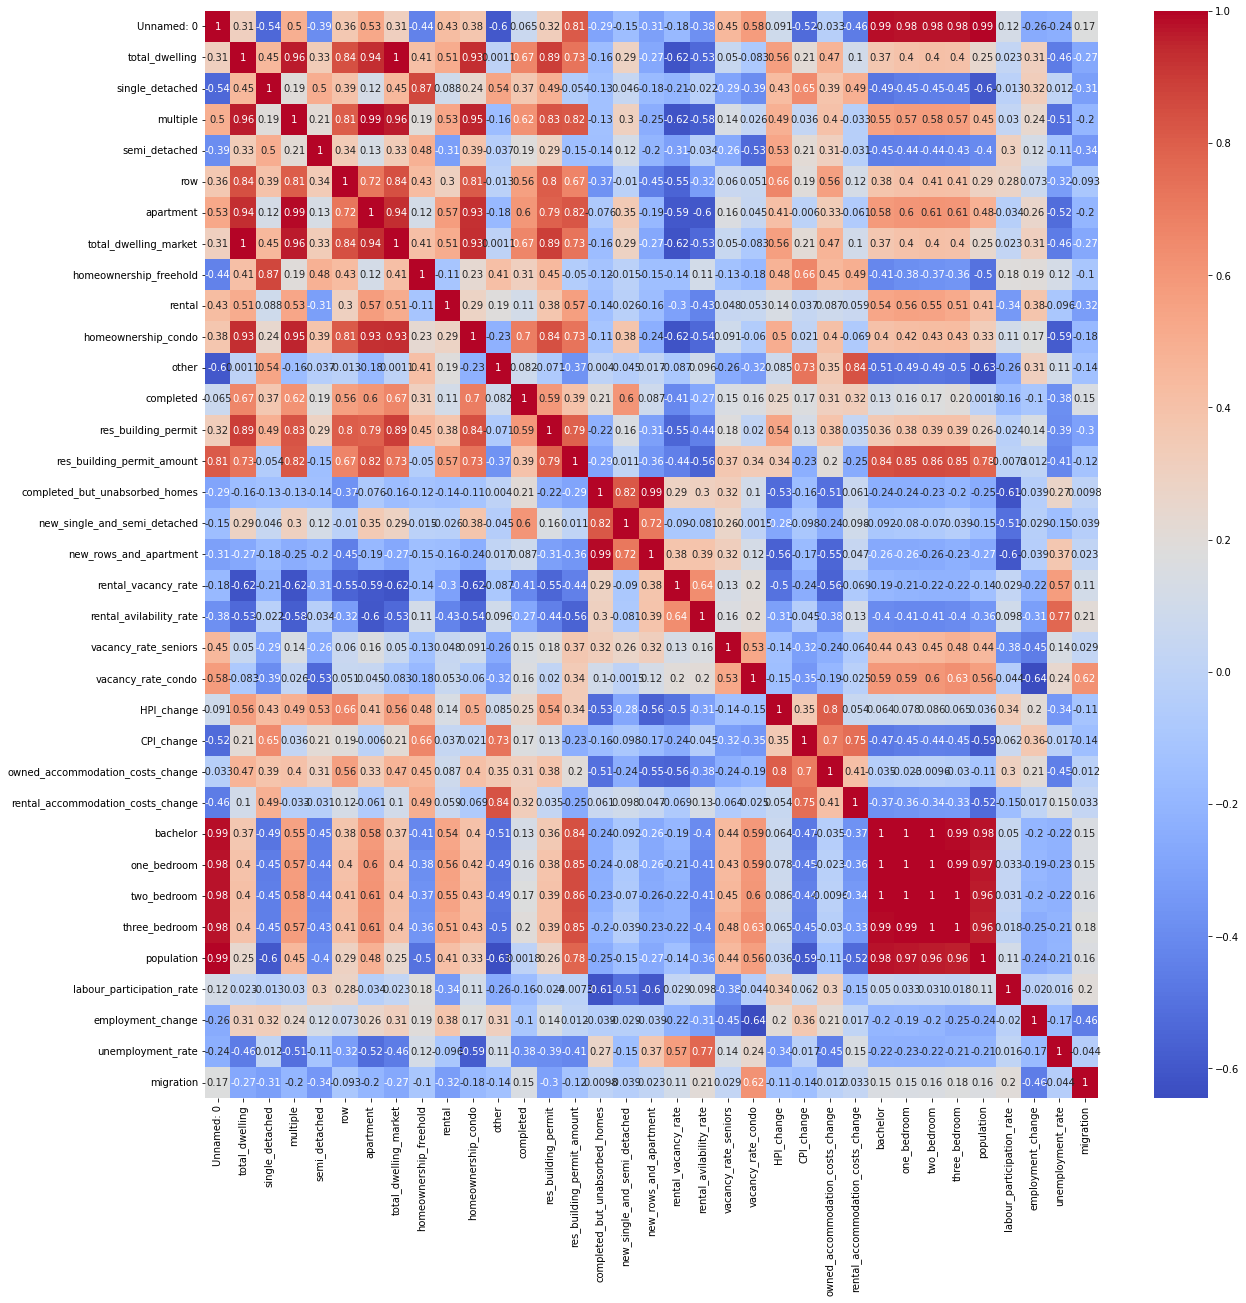

In [18]:
#correlation matrix as ususal
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(vancouver_df_clean.corr(),annot=True,cmap='coolwarm')
plt.savefig('heatmap.png')

In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot

In [20]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



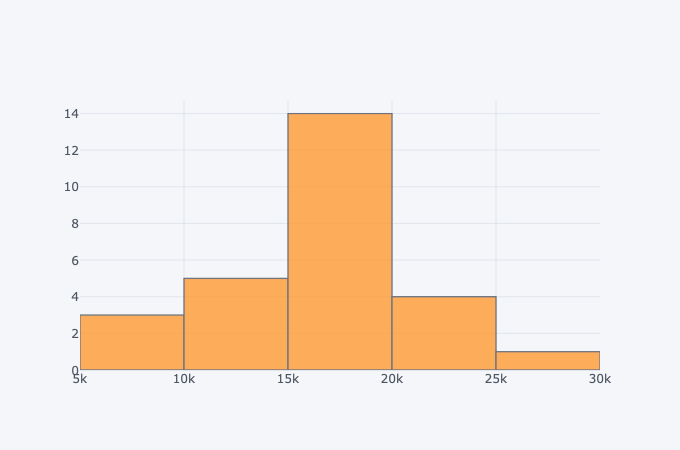

In [21]:
#trying to plot year built histogram
vancouver_df_clean['total_dwelling'].iplot(kind='hist')

#### Based on total dwelling histogram, the most common cost for total dwelling is between 15k and 20k.

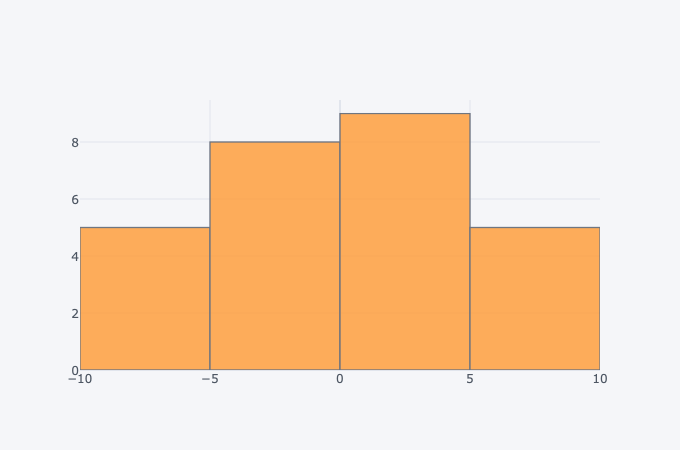

In [22]:
vancouver_df_clean['HPI_change'].iplot(kind='hist')

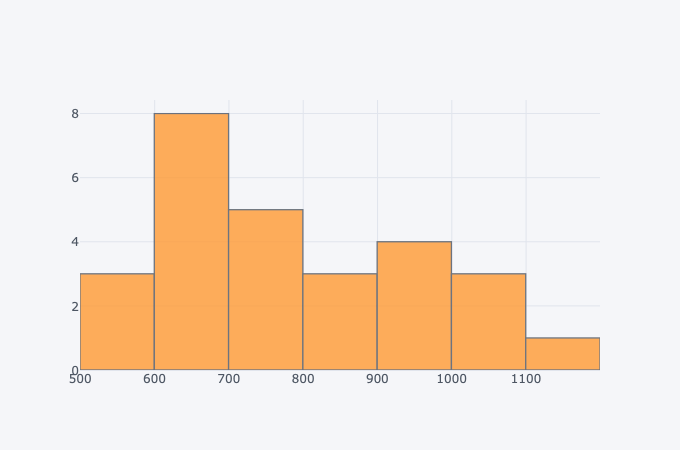

In [23]:
vancouver_df_clean['one_bedroom'].iplot(kind='hist')

#### One Bedroom will cost mostly between 600 and 700 canadian dollars.

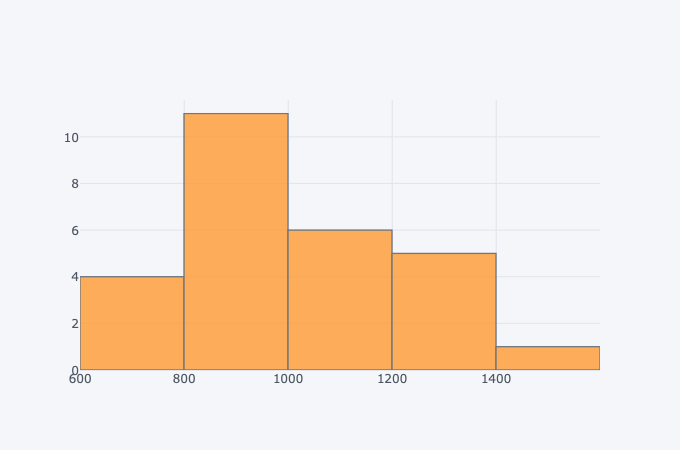

In [24]:
vancouver_df_clean['two_bedroom'].iplot(kind='hist')

#### Two bedrooms will cost between 800 and 1000 canadian dollars.

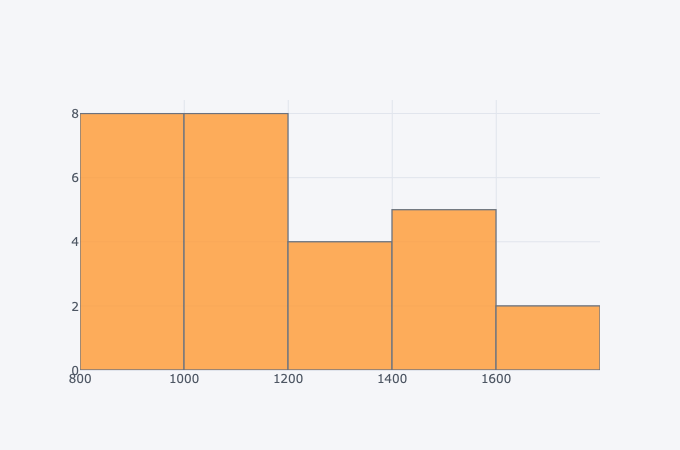

In [25]:
vancouver_df_clean['three_bedroom'].iplot(kind='hist')

#### Three bedrooms will range mostly from 800 to 1200 canadian dollars.

In [26]:
#correlation of a column
def corr_of_a_column(df,column_name,how_many=None,ax=None):
    how_many = len(df)if how_many == None else how_many
    cor = df.corr()[[column_name]].sort_values(by=column_name,ascending=False)[:how_many]
    print(cor)
    sns.heatmap(cor,annot=True,cmap=sns.cubehelix_palette(start=.5,rot=-.5,as_cmap=True),ax=ax)
    

#### HPI is highly correlated to the new total dwellings?

                                   HPI_change
HPI_change                           1.000000
owned_accommodation_costs_change     0.801956
row                                  0.659720
total_dwelling                       0.563244
total_dwelling_market                0.563244
res_building_permit                  0.539751
semi_detached                        0.533781
homeownership_condo                  0.502466
multiple                             0.488390
homeownership_freehold               0.478868
single_detached                      0.432476
apartment                            0.411724
CPI_change                           0.354099
res_building_permit_amount           0.340708
labour_participation_rate            0.335119
completed                            0.252962
employment_change                    0.204897
rental                               0.139756
Unnamed: 0                           0.090955
two_bedroom                          0.085711
other                             

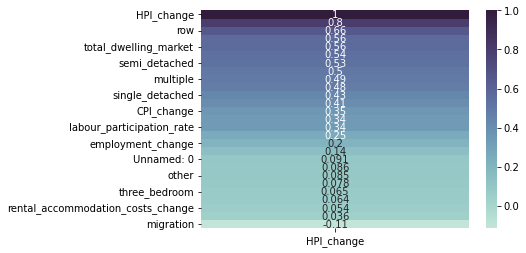

In [27]:
corr_of_a_column(vancouver_df_clean, 'HPI_change')

#### HPL is correlated to total dwelling but owned_accomodation_costs_chage is highly correlated to HPL.

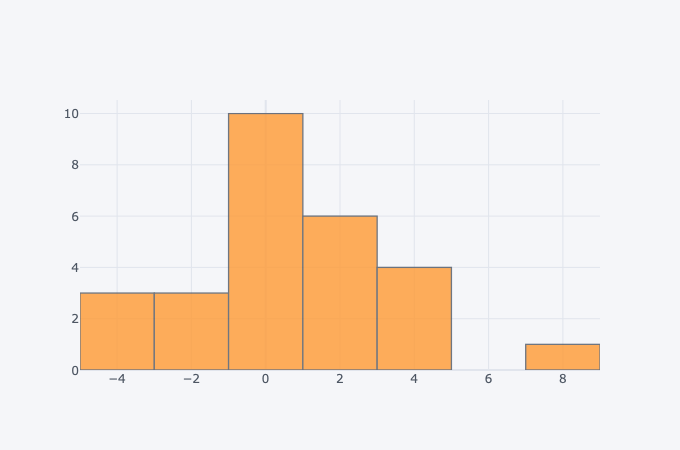

In [28]:
vancouver_df_clean['owned_accommodation_costs_change'].iplot(kind='hist')

#### Most owned accomodation cost will change from -1 to +1 range.

In [30]:
vancouver_df_clean.columns

Index(['Unnamed: 0', 'year', 'total_dwelling', 'single_detached', 'multiple',
       'semi_detached', 'row', 'apartment', 'total_dwelling_market',
       'homeownership_freehold', 'rental', 'homeownership_condo', 'other',
       'completed', 'res_building_permit', 'res_building_permit_amount',
       'completed_but_unabsorbed_homes', 'new_single_and_semi_detached',
       'new_rows_and_apartment', 'rental_vacancy_rate',
       'rental_avilability_rate', 'vacancy_rate_seniors', 'vacancy_rate_condo',
       'HPI_change', 'CPI_change', 'owned_accommodation_costs_change',
       'rental_accommodation_costs_change', 'bachelor', 'one_bedroom',
       'two_bedroom', 'three_bedroom', 'population',
       'labour_participation_rate', 'employment_change', 'unemployment_rate',
       'migration', 'region'],
      dtype='object')

In [35]:
vancouver_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 27 to 53
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         27 non-null     int64         
 1   year                               27 non-null     datetime64[ns]
 2   total_dwelling                     27 non-null     int64         
 3   single_detached                    27 non-null     int64         
 4   multiple                           27 non-null     int64         
 5   semi_detached                      27 non-null     int64         
 6   row                                27 non-null     int64         
 7   apartment                          27 non-null     int64         
 8   total_dwelling_market              27 non-null     int64         
 9   homeownership_freehold             27 non-null     float64       
 10  rental                             27 n

In [36]:
def get_continuous_df(df):
    return df.select_dtypes(include=[np.int64, np.float64])

# Get df with columns having categorical variables
def get_categorical_df(df):
    return df.select_dtypes(include=['object'])

In [37]:
continuous_df = get_continuous_df(vancouver_df_clean)
continuous_df.head()

,Unnamed: 0,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,rental,...,rental_accommodation_costs_change,bachelor,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,migration
27,0,17970,6316,11654,607,3047,8000,17970,6425.0,1895,...,6.445396,472,566,751,876,1608.288,65.6,2.457594,6.6,26077
28,1,14769,6991,7778,430,1429,5919,14769,7080.0,1738,...,4.224502,472,585,752,896,1646.854,65.6,2.457594,6.6,26077
29,2,18684,7603,11081,770,2542,7769,18684,7759.0,1901,...,2.354758,480,594,771,902,1691.289,65.6,2.457594,6.6,26077
30,3,21307,6593,14714,929,2340,11445,21307,6899.0,1435,...,1.998869,494,611,790,935,1736.726,65.6,2.457594,6.6,26077
31,4,20473,6345,14128,822,2672,10634,20473,6627.0,1181,...,1.756332,513,623,812,957,1792.984,65.6,2.457594,6.6,26077


In [38]:
categorical_df = get_categorical_df(vancouver_df_clean)
categorical_df.head()

,region
27,vancouver
28,vancouver
29,vancouver
30,vancouver
31,vancouver


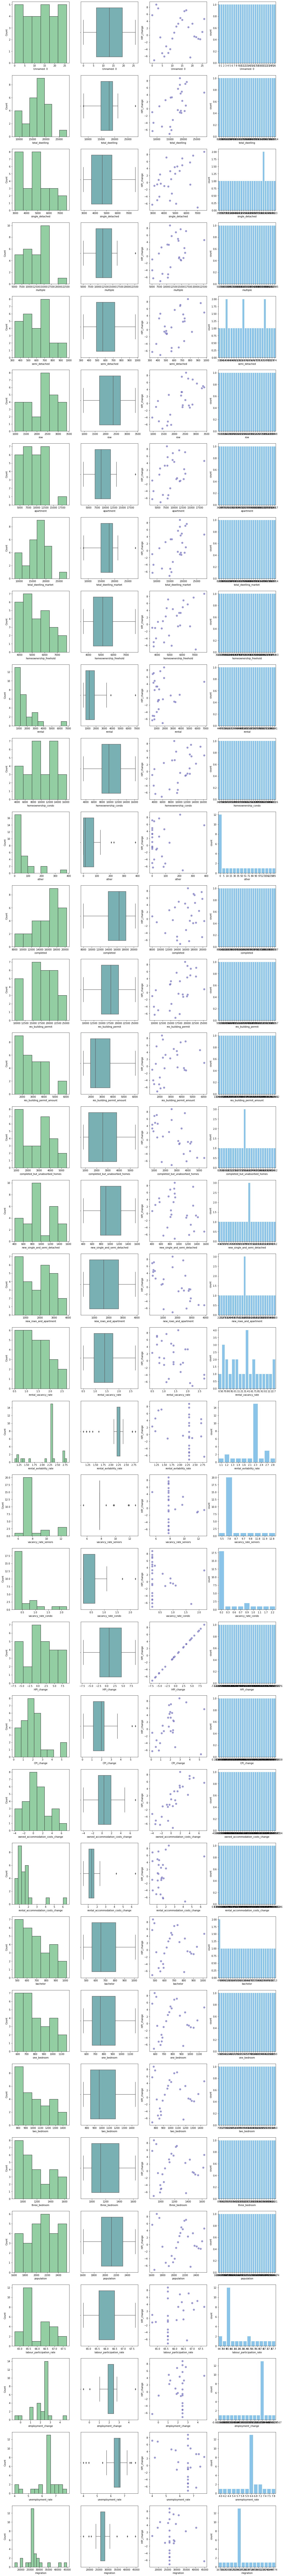

In [39]:
def plot_base_relation(df, figsize=(20, 200)):
    columns = df.columns.tolist()
    _, axs = plt.subplots(len(columns), 4, figsize=figsize)
    
    for idx, column in enumerate(columns):
        # To get distribution of data
        sns.histplot(
            x=df[column],
            kde=False,
            color='#65b87b', alpha=.7,
            ax=axs[idx][0]
        )

        # To get knowledge about outliers
        sns.boxplot(
            x=df[column],
            color='#6fb9bd',
            ax=axs[idx][1]
        )

        # To get its realtion with SalePrice
        sns.scatterplot(
            x=column, y='HPI_change', data=df,
            color='#706dbd', alpha=.7, s=80,
            ax=axs[idx][2]
        )
        
        # To get count plot for `column`
        sns.countplot(
            x=column, data=df,
            color='#42b0f5', alpha=.7,
            ax=axs[idx][3]
        )
        
        
plot_base_relation(continuous_df)

#### From the above visualization, it is clear that HPI change is in regression format.

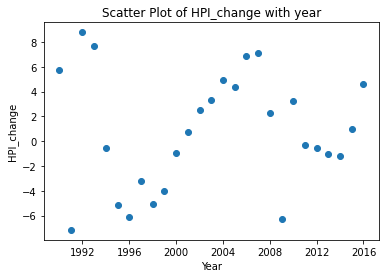

In [48]:
import matplotlib.pyplot as plt
plt.scatter(vancouver_df_clean['year'], vancouver_df_clean['HPI_change'])
plt.title("Scatter Plot of HPI_change with year")
plt.xlabel("Year")
plt.ylabel("HPI_change")
plt.show() 

#### It is clearly seen that HPI change is lower in 2009. In addition, 2009 is the year of great recession so we can conclude that HPI change in Vancouver is low due to recession on 2009.

#### 

In [41]:
from scipy.stats import zscore, pearsonr

In [42]:
def get_corr(data_1, data_2):
    return round(pearsonr(data_1, data_2)[0], 2)
    
    
def get_corr_info_for_df(df):
    columns = df.columns.tolist()
    
    # To keep record of which corr info is displayed & hence
    # not to display opposite corr info 
    # eg. if a - b is display then b - a will not be displayed
    # since they will have same result
    displayed = []
    def is_displayed(main_column, secondary_column, displayed_list):
        return any([
            True for tup in displayed_list if 
            (tup[0] == main_column and tup[1] == secondary_column) 
            or 
            (tup[1] == main_column and tup[0] == secondary_column)
        ])

    
    # main column is the one for which we'll find all the corr info
    # related to secondary column
    for main_column in columns:
        for secondary_column in columns:
            if secondary_column != main_column and not is_displayed(main_column, secondary_column, displayed):
                corr = get_corr(df[main_column], df[secondary_column])
                if corr >= .7 or corr <= -.7:
                    # print only if pearson correlation is high (.7 to .9) or very high (.9 to 1)
                    print(f'{secondary_column} - {main_column}: {corr}')
                    displayed.append((main_column, secondary_column))
                    
                    
get_corr_info_for_df(continuous_df)

res_building_permit_amount - Unnamed: 0: 0.81
bachelor - Unnamed: 0: 0.99
one_bedroom - Unnamed: 0: 0.98
two_bedroom - Unnamed: 0: 0.98
three_bedroom - Unnamed: 0: 0.98
population - Unnamed: 0: 0.99
multiple - total_dwelling: 0.96
row - total_dwelling: 0.84
apartment - total_dwelling: 0.94
total_dwelling_market - total_dwelling: 1.0
homeownership_condo - total_dwelling: 0.93
res_building_permit - total_dwelling: 0.89
res_building_permit_amount - total_dwelling: 0.73
homeownership_freehold - single_detached: 0.87
row - multiple: 0.81
apartment - multiple: 0.99
total_dwelling_market - multiple: 0.96
homeownership_condo - multiple: 0.95
res_building_permit - multiple: 0.83
res_building_permit_amount - multiple: 0.82
apartment - row: 0.72
total_dwelling_market - row: 0.84
homeownership_condo - row: 0.81
res_building_permit - row: 0.8
total_dwelling_market - apartment: 0.94
homeownership_condo - apartment: 0.93
res_building_permit - apartment: 0.79
res_building_permit_amount - apartment: 0.

#### Total dwelling is highly correlated to multiple, row, apartment and condo. Therefore, it means that most of the houses in Vancouver are in multiple, row , apartment and condo.

#### From the correlation, we can conclude that most of the people live in two bedroom and three bedroom as population is highly correlated to two-bedroom and three-bedroom.


In [ ]:
vancouver_df_col_modified.sample(5)